In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import dabl


In [3]:
data = pd.read_csv('Mall_Customers.csv')

In [4]:
data.shape

(200, 5)

In [5]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
193,194,Female,38,113,91
182,183,Male,46,98,15
95,96,Male,24,60,52
110,111,Male,65,63,52
25,26,Male,29,28,82


In [9]:
data['Male']=data['Gender']=='Male'
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Male
0,1,Male,19,15,39,True
1,2,Male,21,15,81,True
2,3,Female,20,16,6,False
3,4,Female,23,16,77,False
4,5,Female,31,17,40,False


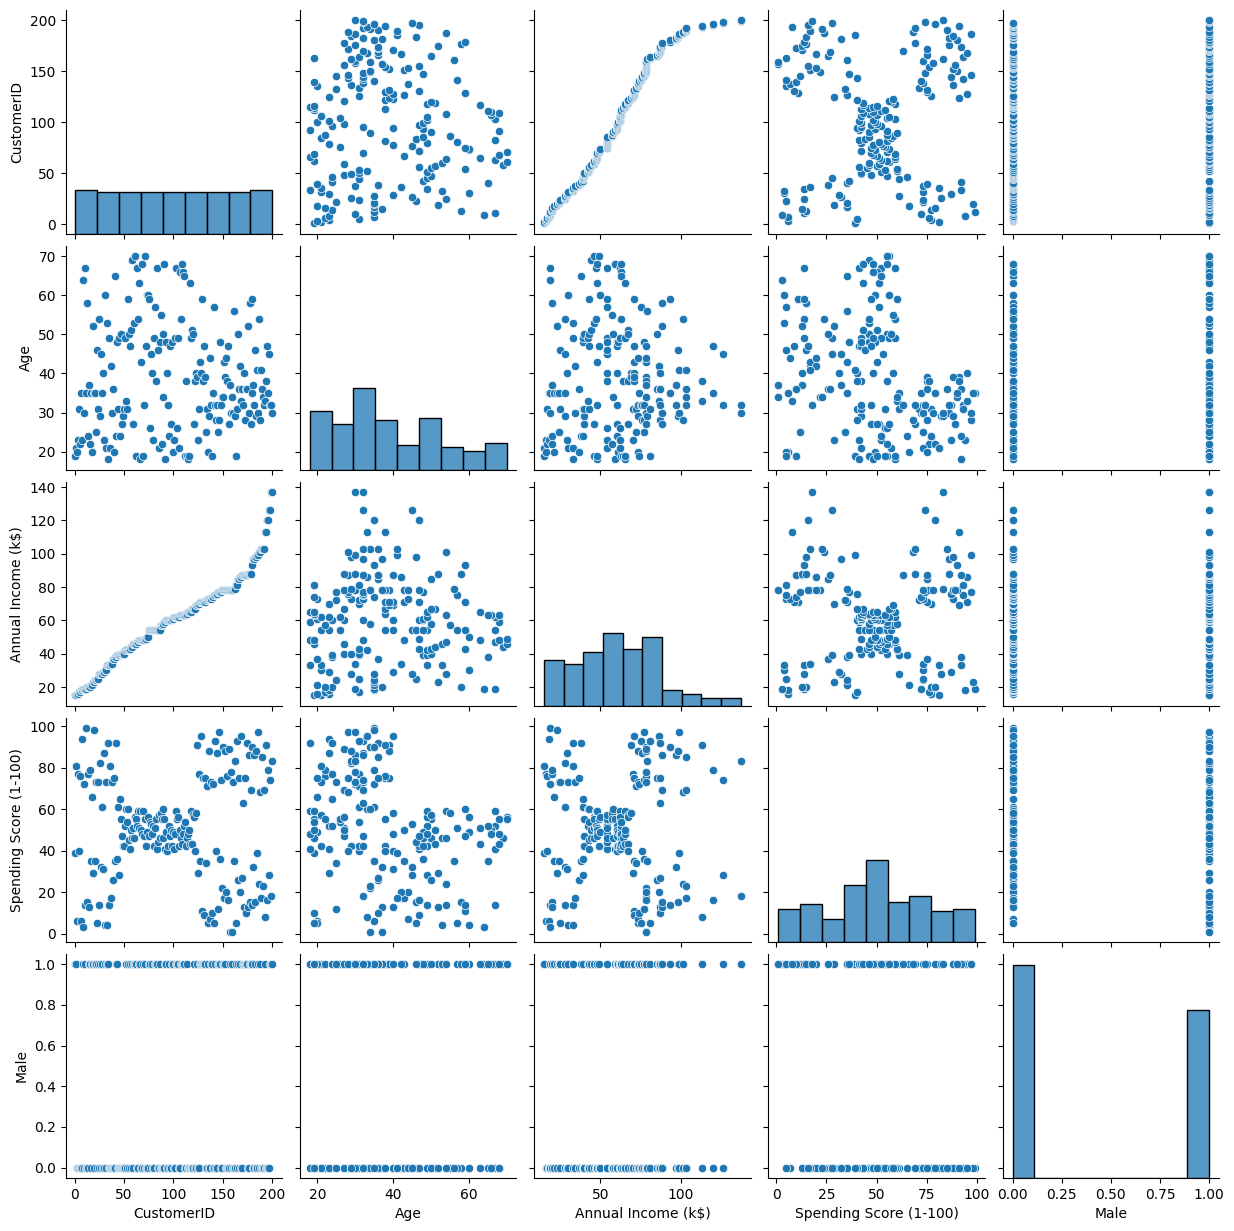

In [10]:
sns.pairplot(data)
plt.show()

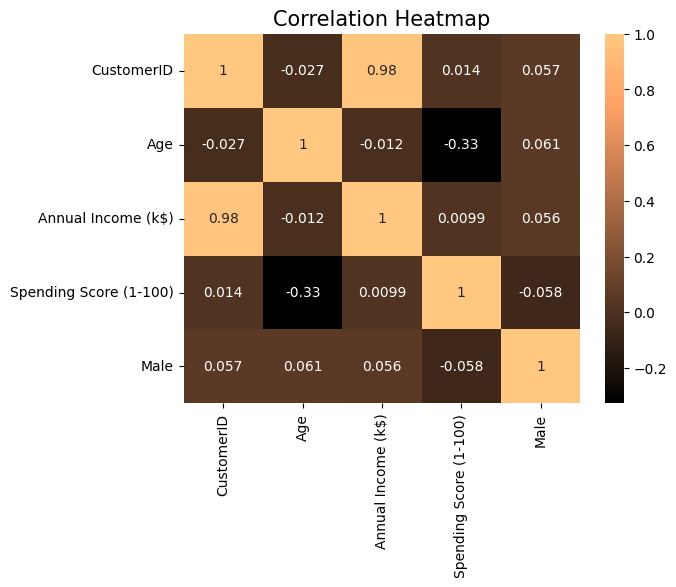

In [11]:
sns.heatmap(data[[i for i in data.columns if i!='Gender']].corr(),annot=True,cmap='copper')
plt.title('Correlation Heatmap',fontsize=15)
plt.show()

Target looks like regression


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=3.10E-02'}, xlabel='Spending Score (1-100)', ylabel='Gender'>,
         <Axes: title={'center': 'F=3.10E-02'}, xlabel='Spending Score (1-100)', ylabel='Male'>]],
       dtype=object)]

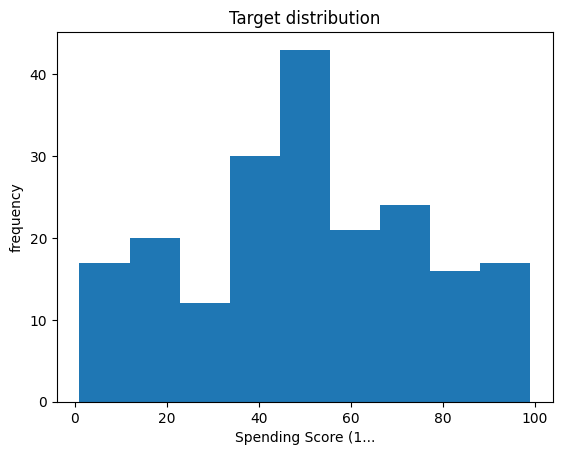

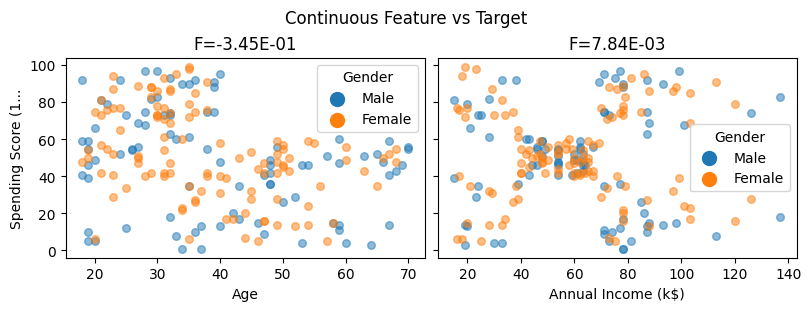

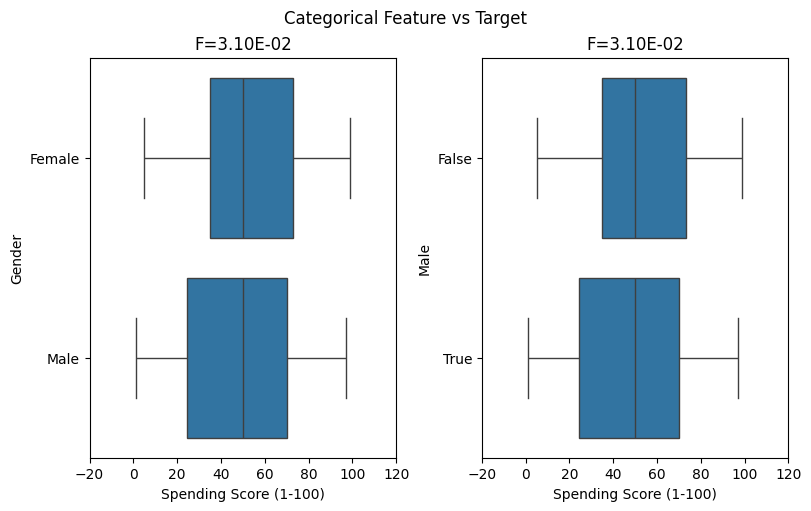

In [12]:
dabl.plot(data,target_col='Spending Score (1-100)')

Target looks like regression


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


[<Axes: title={'center': 'Target distribution'}, xlabel='Annual Income (k$)', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=1.98E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Spending Score (1-100)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=4.21E-02'}, xlabel='Annual Income (k$)', ylabel='Gender'>,
         <Axes: title={'center': 'F=4.21E-02'}, xlabel='Annual Income (k$)', ylabel='Male'>]],
       dtype=object)]

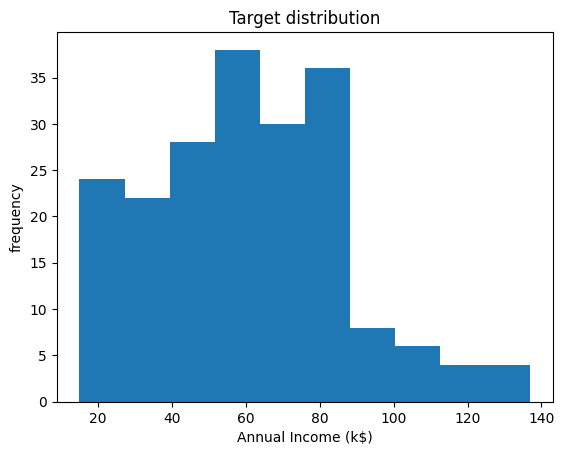

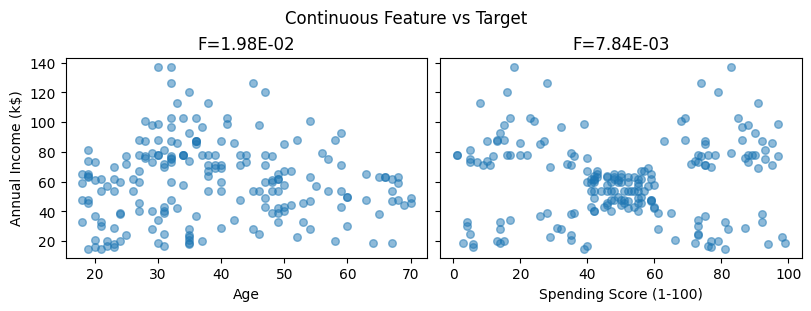

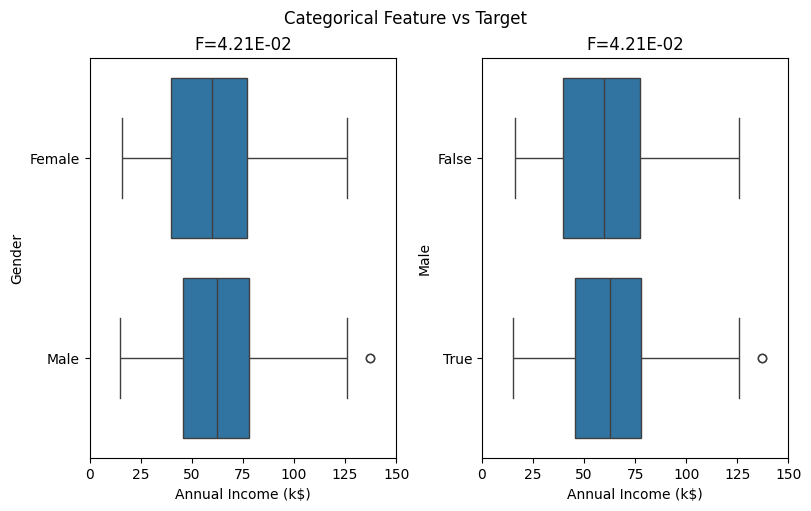

In [13]:
dabl.plot(data,target_col='Annual Income (k$)')

In [14]:
data.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Male
count,200.000000,200,200.000000,200.000000,200.000000,200
unique,NaN,2,NaN,NaN,NaN,2
top,NaN,Female,NaN,NaN,NaN,False
freq,NaN,112,NaN,NaN,NaN,112
mean,100.500000,NaN,38.850000,60.560000,50.200000,NaN
std,57.879185,NaN,13.969007,26.264721,25.823522,NaN
min,1.000000,NaN,18.000000,15.000000,1.000000,NaN
25%,50.750000,NaN,28.750000,41.500000,34.750000,NaN
50%,100.500000,NaN,36.000000,61.500000,50.000000,NaN
75%,150.250000,NaN,49.000000,78.000000,73.000000,NaN


In [15]:
data.isnull().any().any()

False

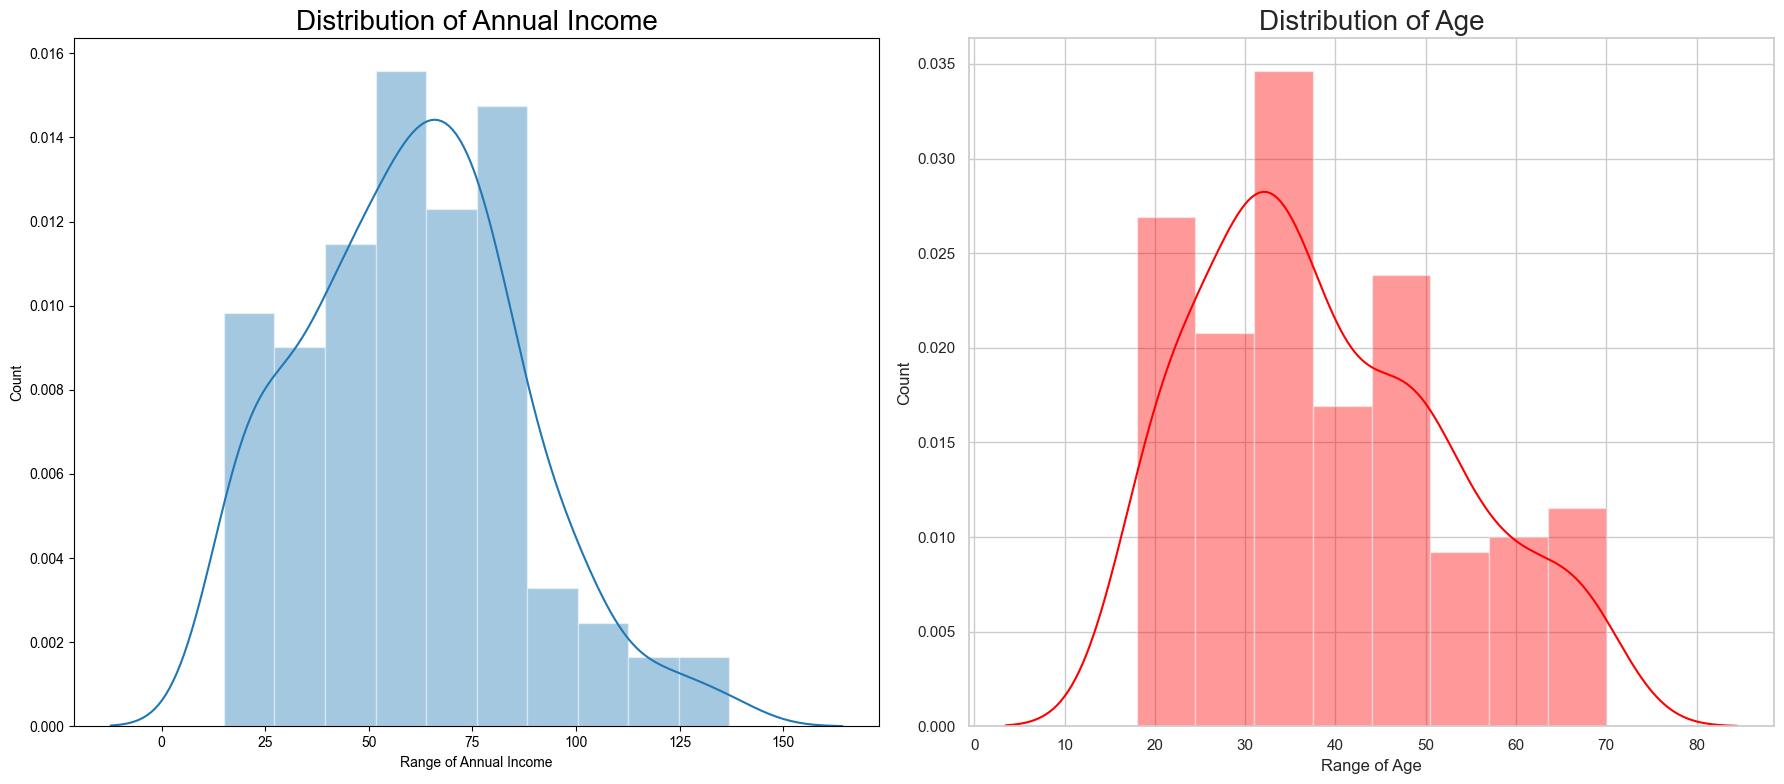

In [16]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(18,8)
plt.subplot(1,2,1)
sns.set(style='whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income',fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.set(style='whitegrid')
sns.distplot(data['Age'],color='red')
plt.title('Distribution of Age',fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

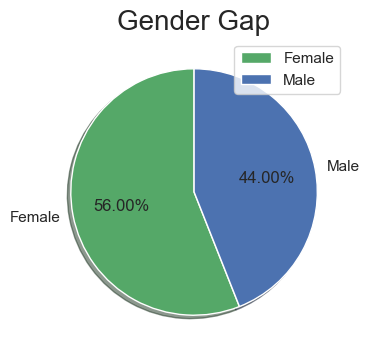

In [17]:
labels = ['Female','Male']
size = data['Gender'].value_counts()
colors = ['g','b']
explode = [0,0.001]
plt.rcParams['figure.figsize']=(4,4)
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, startangle=90, autopct='%.2f%%')
plt.title('Gender Gap', fontsize=20)
plt.axis('off')
plt.legend(labels)
plt.show()

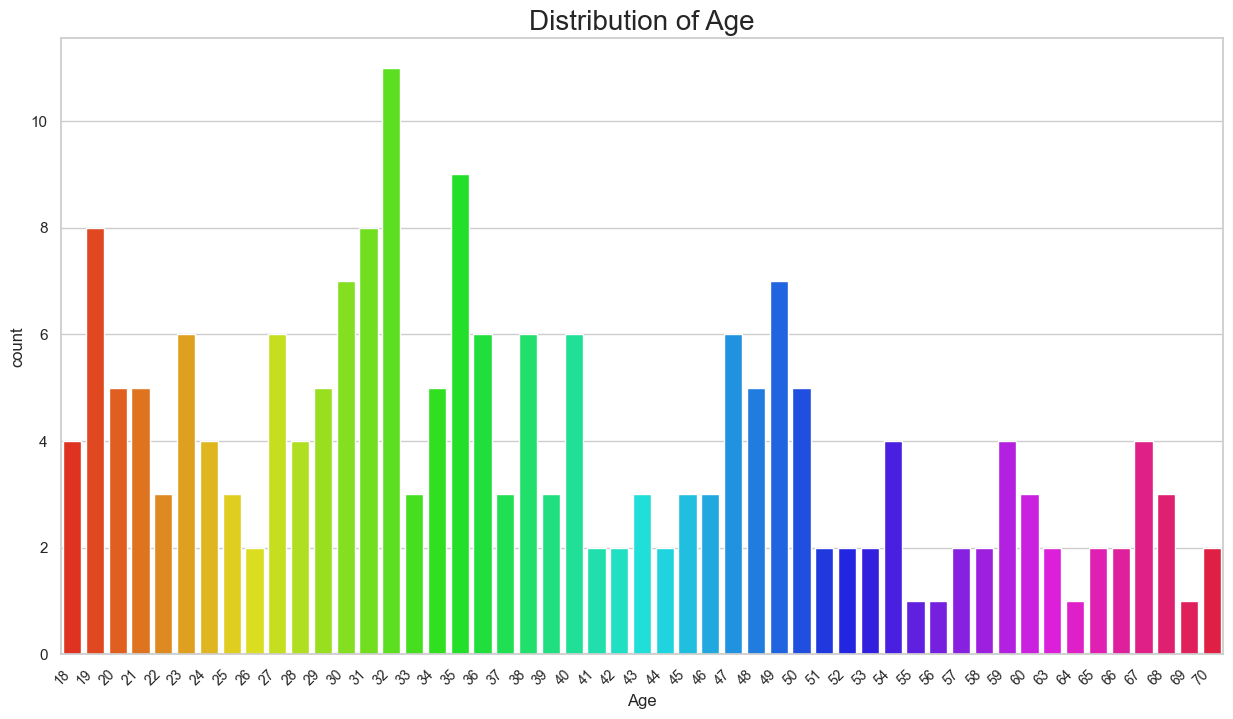

In [18]:
plt.rcParams['figure.figsize']=(15,8)
sns.countplot(x=data['Age'],palette='hsv')
plt.title('Distribution of Age',fontsize=20)
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.show()

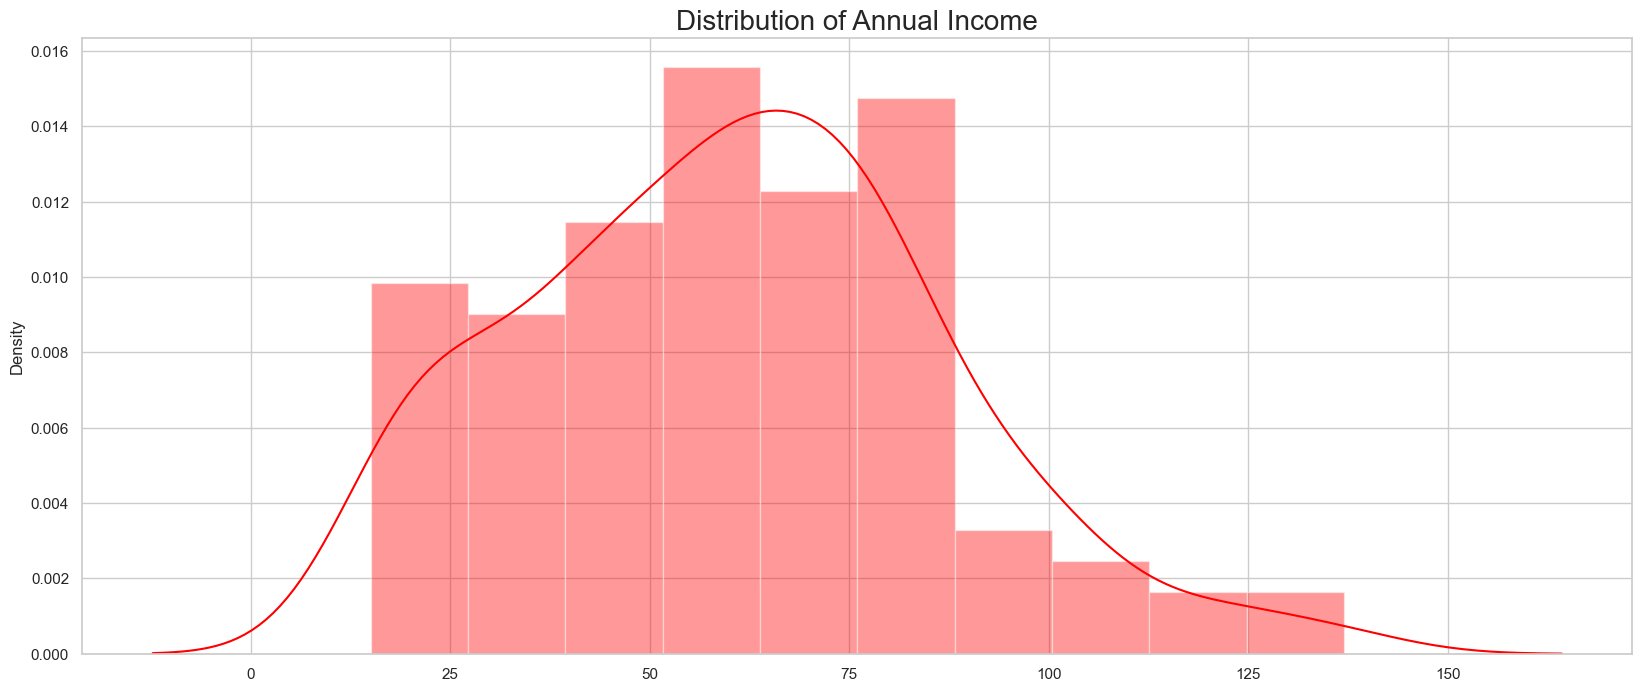

In [19]:
plt.rcParams['figure.figsize']=(20,8)
sns.distplot(x=data['Annual Income (k$)'],color='red')
plt.title('Distribution of Annual Income',fontsize = 20)
plt.show()

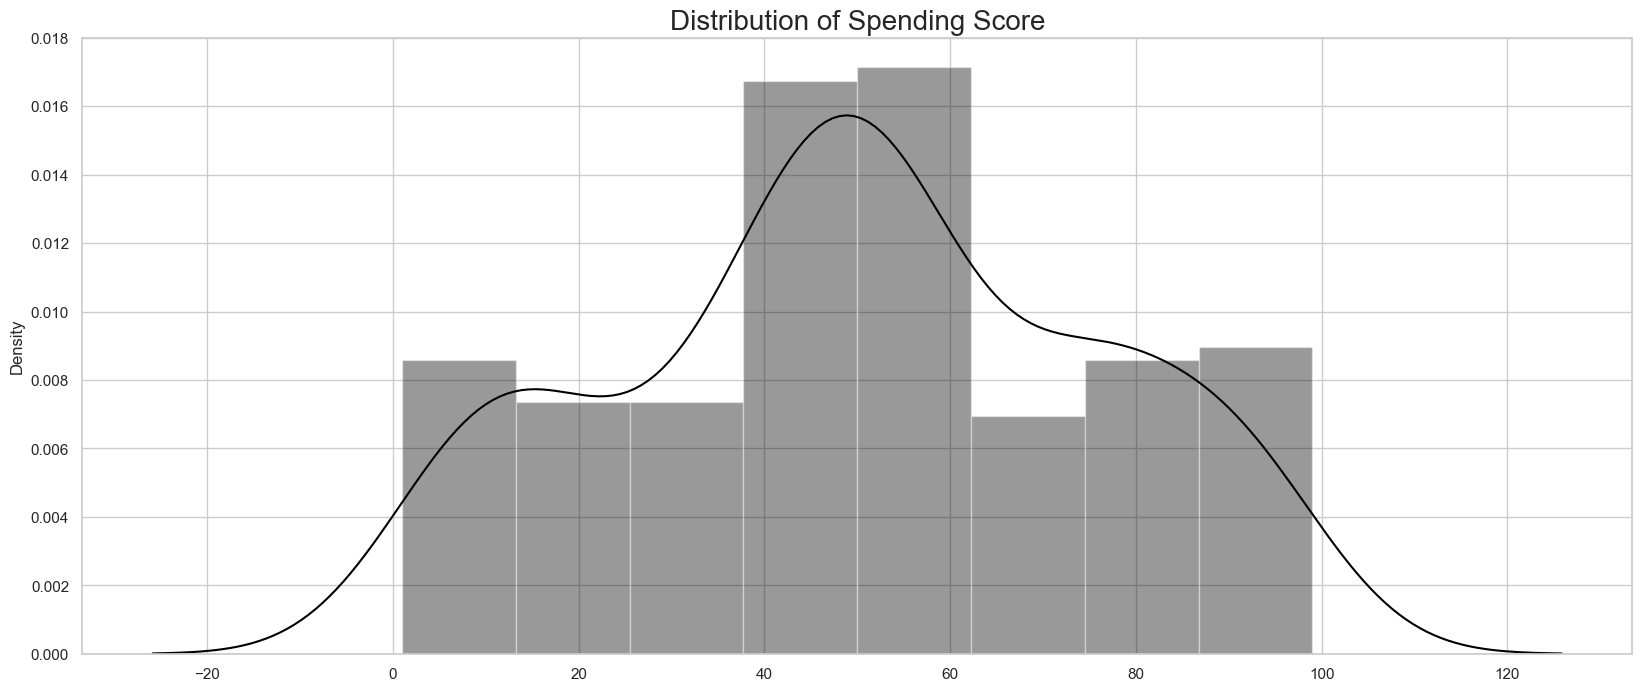

In [20]:
plt.rcParams['figure.figsize']=(20,8)
sns.distplot(x=data['Spending Score (1-100)'],color = 'black')
plt.title('Distribution of Spending Score',fontsize =20)
plt.show()

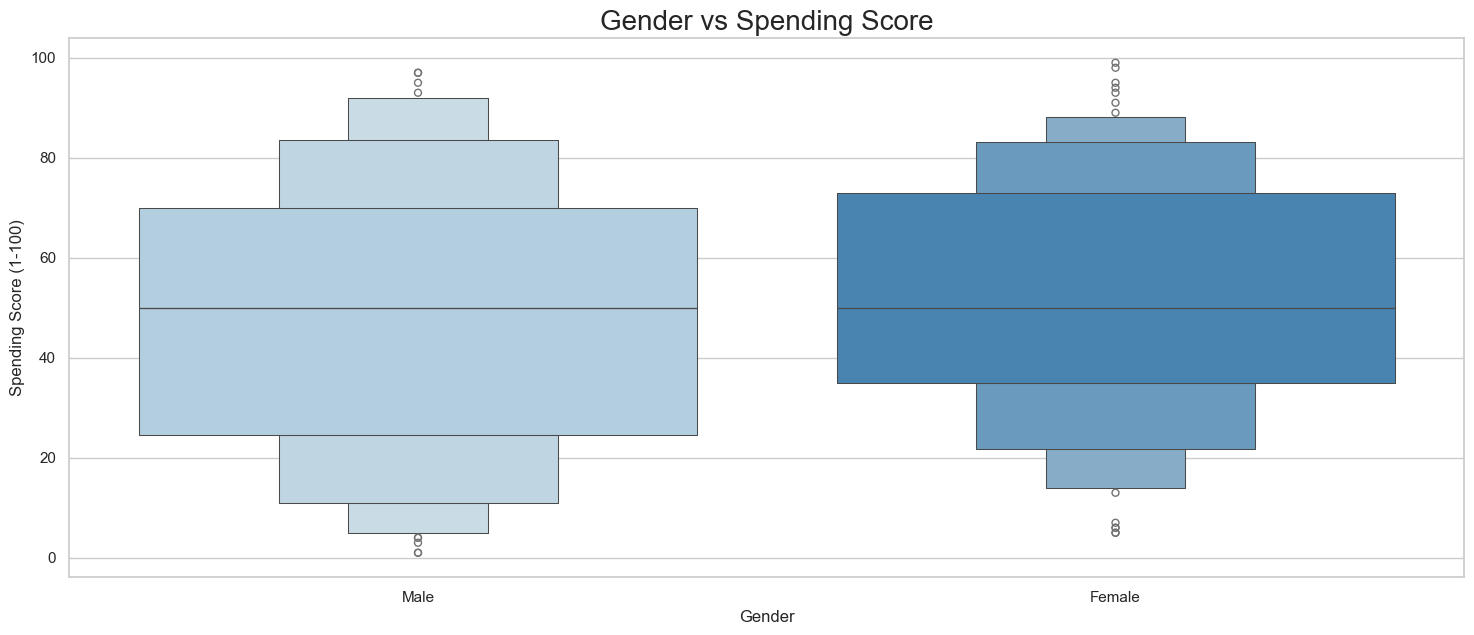

In [21]:
plt.rcParams['figure.figsize']=(18,7)
sns.boxenplot(x='Gender', y='Spending Score (1-100)', data=data, palette='Blues')
plt.title('Gender vs Spending Score', fontsize=20)
plt.show()

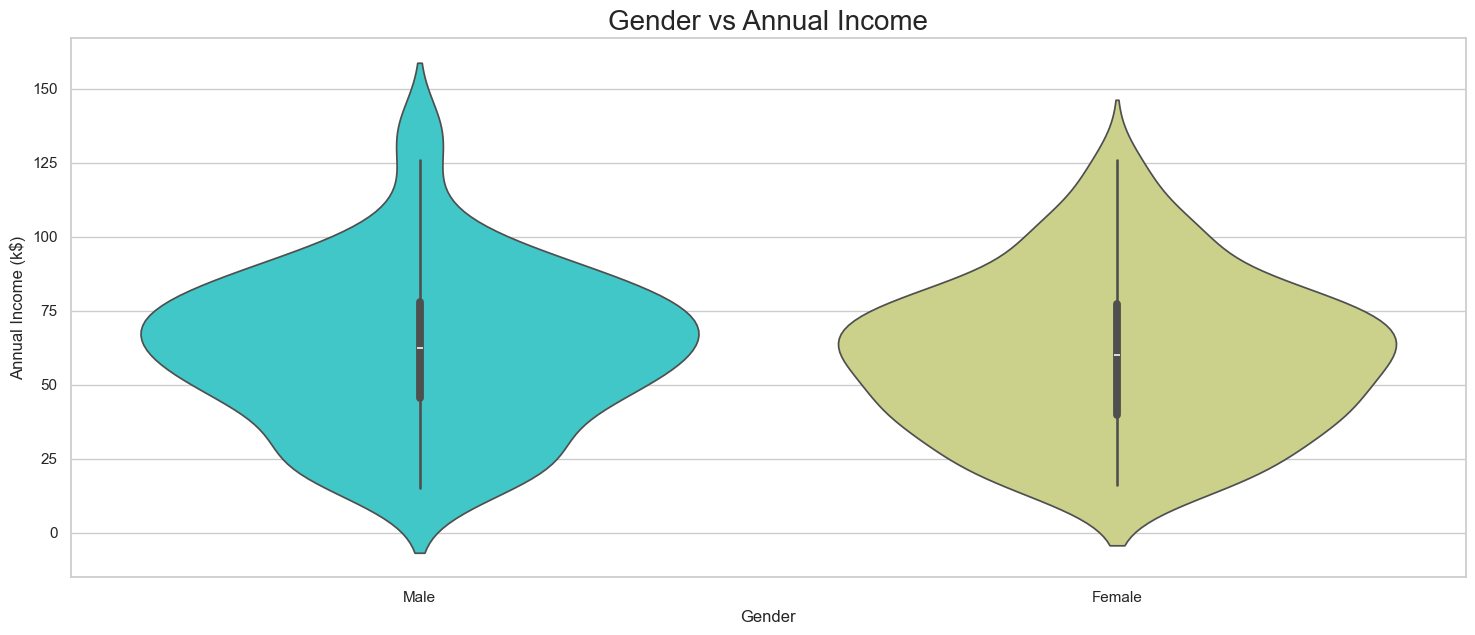

In [22]:
plt.rcParams['figure.figsize']=(18,7)
sns.violinplot(x=data['Gender'],y=data['Annual Income (k$)'],palette = 'rainbow')
plt.title('Gender vs Annual Income', fontsize = 20)
plt.show()

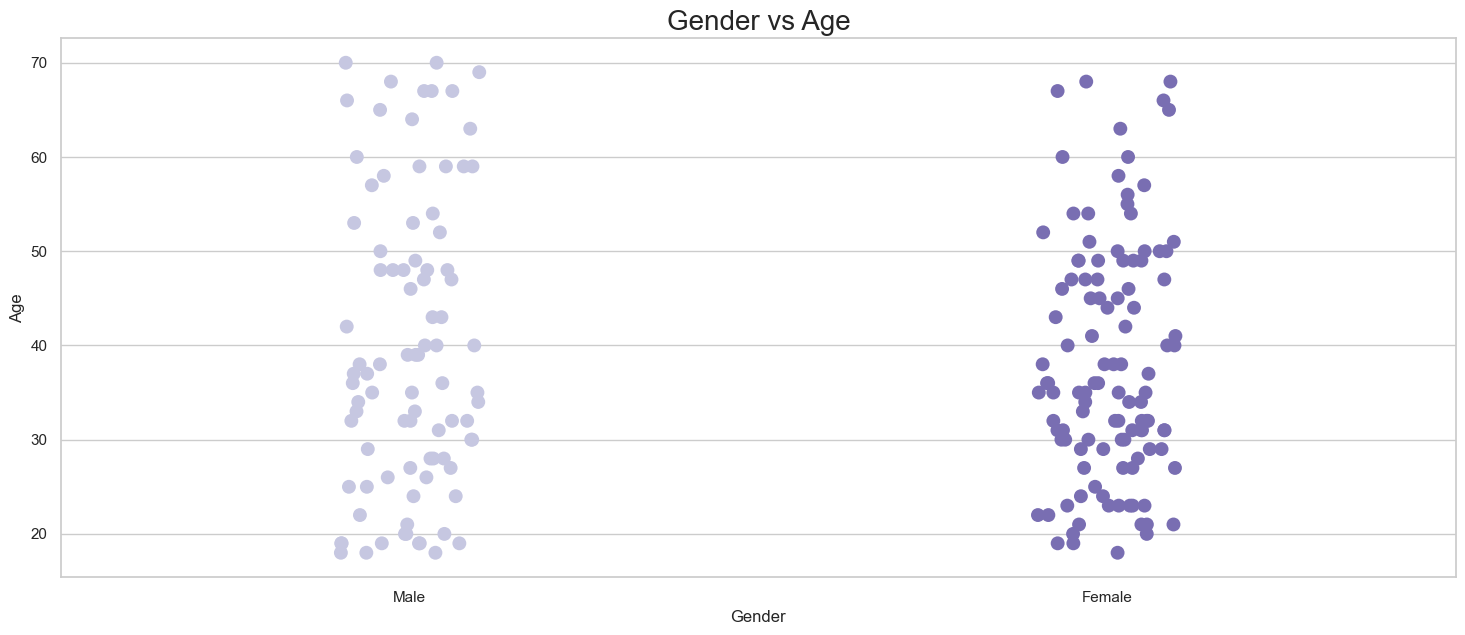

In [23]:
plt.rcParams['figure.figsize']=(18,7)
sns.stripplot(x=data['Gender'],y=data['Age'],palette = 'Purples',size=10)
plt.title('Gender vs Age',fontsize = 20)
plt.show()

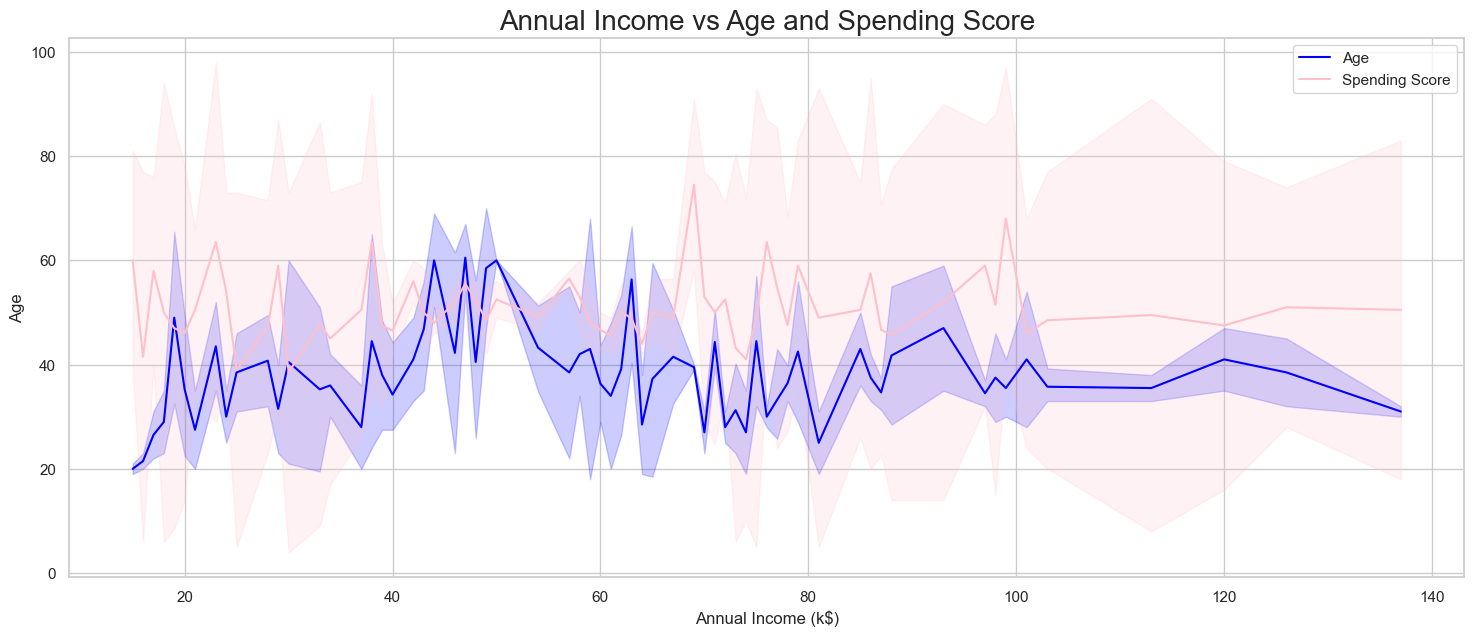

In [24]:
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x=x, y=y, color='blue', label='Age')
sns.lineplot(x=x, y=z, color='pink', label='Spending Score')
plt.title('Annual Income vs Age and Spending Score', fontsize=20)
plt.legend()
plt.show()

In [25]:
#K-means-clustering
X=data.loc[:,['Spending Score (1-100)','Annual Income (k$)']].values
print(X.shape)

(200, 2)


In [26]:
X_data=pd.DataFrame(X)
X_data.head()

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


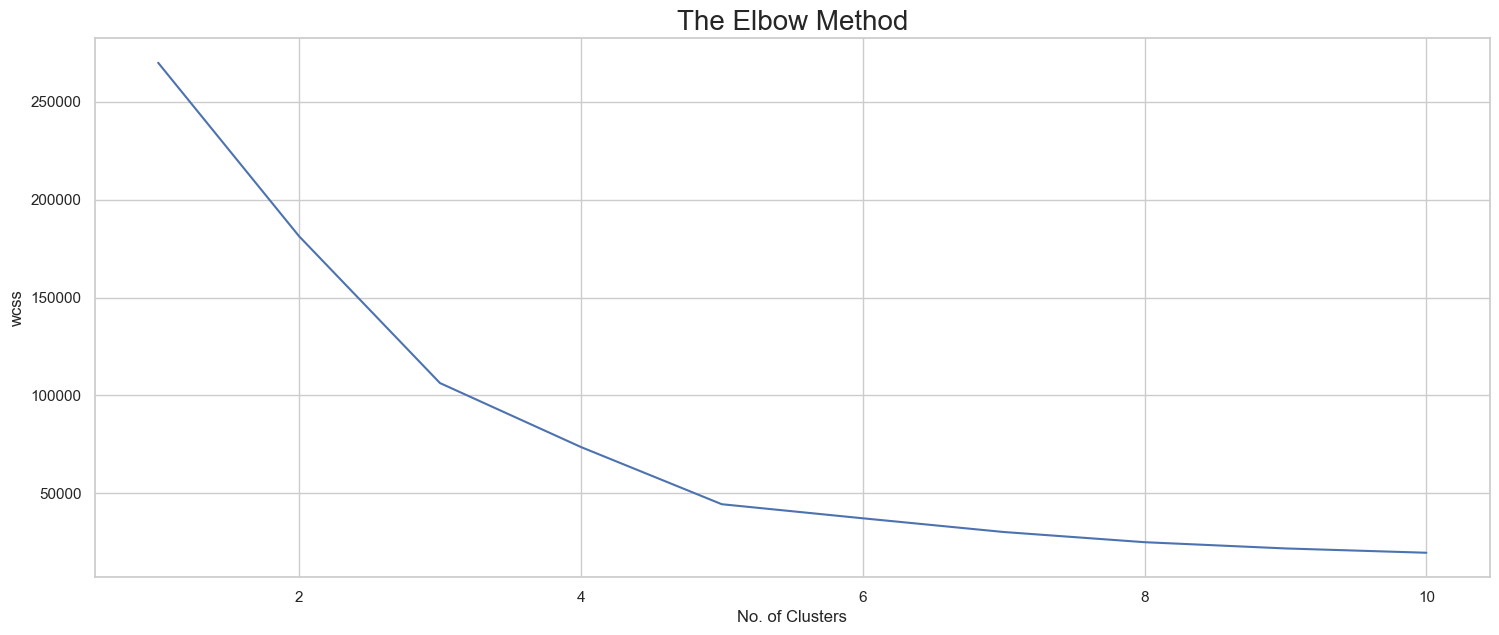

In [ ]:
# find optimal number of clusters
# elbow : plot explained variation as a function of number of clusters, pick elbow 
# Within cluster sum of squares (WCSS)
from sklearn.cluster import KMeans
WCSS = []
for i in range (1,11):
    km = KMeans(n_clusters=i,init = 'k-means++',max_iter = 300,n_init = 10, random_state =0)
    km.fit(X_data)
    WCSS.append(km.inertia_)

plt.plot(range(1,11),WCSS)
plt.title('The Within Cluster Sum of Squares Elbow Method',fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [28]:
plt.style.use('seaborn-v0_8-colorblind')
km=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(X_data)
X_data['income_score_class']=y_means


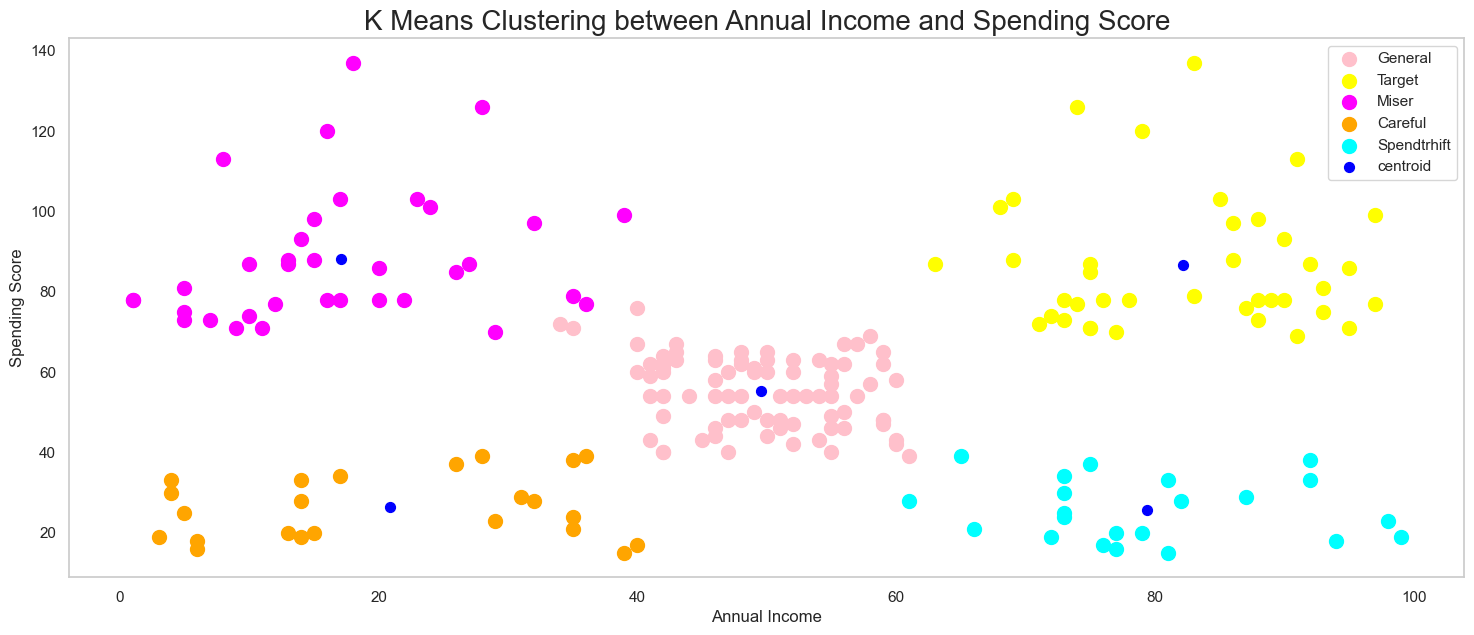

In [29]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=100,c='pink',label='General')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=100,c='yellow',label='Target')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=100,c='magenta',label='Miser')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=100,c='orange',label='Careful')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=100,c='cyan',label='Spendtrhift')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='blue',label='centroid')

plt.style.use('seaborn-v0_8-colorblind')
plt.title('K Means Clustering between Annual Income and Spending Score',fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [30]:
new_X=data[['Age','Spending Score (1-100)']].copy().values
age_data=pd.DataFrame(new_X)
age_data.head()

,0,1
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


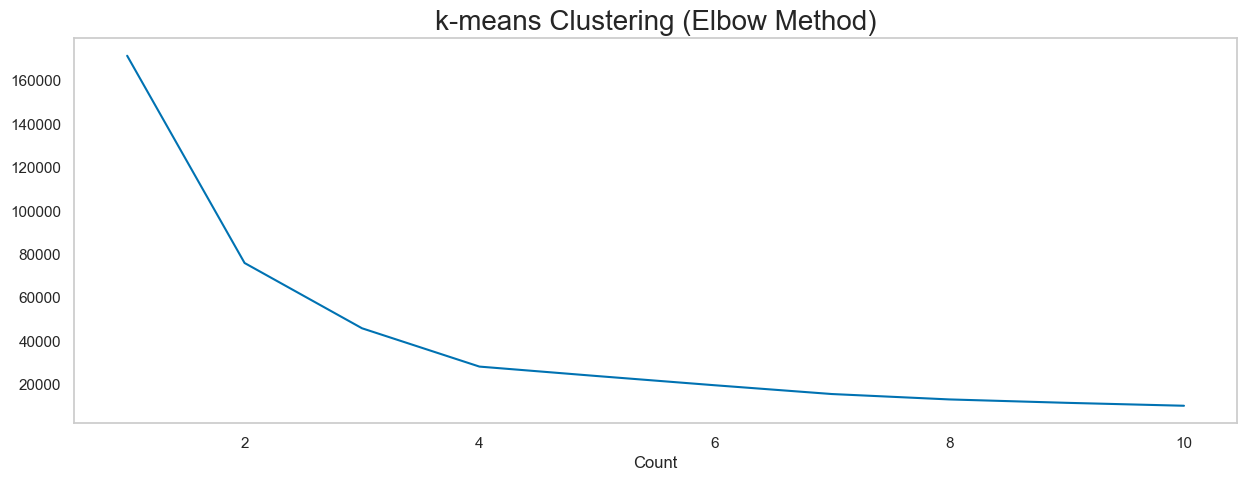

In [31]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(age_data)
    WCSS.append(kmeans.inertia_)

plt.rcParams['figure.figsize']=(15,5)
plt.plot(range(1,11),WCSS)
plt.title('k-means Clustering (Elbow Method)',fontsize=20)
plt.xlabel('Count')
plt.grid()
plt.show()

In [32]:
age_model=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
age_data['age_score_class']=age_model.fit_predict(age_data)
age_score=age_data['age_score_class']

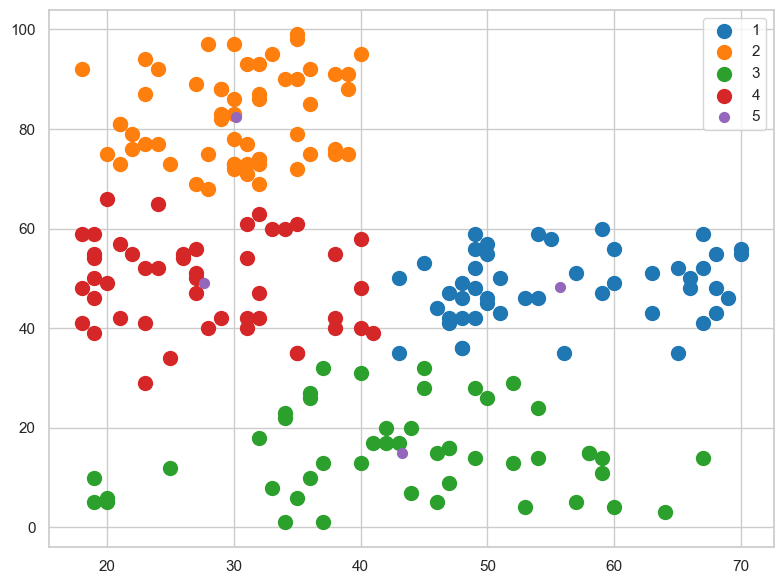

In [33]:

plt.figure(figsize=(8,6))
colors=['#1f77b4','#ff7f0e','#2ca02c', '#d62728',  '#9467bd'] 
labels=[str(i+1) for i in range(5)]
for i in range(0,4):
    plt.scatter(age_data.loc[age_score==i,0],age_data.loc[age_score==i,1],s=100,label=labels[i],c=colors[i])
plt.scatter(age_model.cluster_centers_[:,0],age_model.cluster_centers_[:,1],s=50,c=colors[-1],label=labels[-1])
plt.tight_layout()
plt.legend()
plt.show()

In [34]:
# Only rename the first three columns of age_data and X_data
age_data.rename(columns={age_data.columns[0]: 'Age',
						age_data.columns[1]: 'Spending Score (1-100)',
						age_data.columns[2]: 'age_score_class'}, inplace=True)
X_data.rename(columns={X_data.columns[0]: 'Spending Score (1-100)',
					   X_data.columns[1]: 'Annual Income (k$)',
					   X_data.columns[2]: 'income_score_class'}, inplace=True)

# Create tuple keys for mapping
age_data['key'] = list(zip(age_data['Age'], age_data['Spending Score (1-100)']))
X_data['key'] = list(zip(X_data['Spending Score (1-100)'], X_data['Annual Income (k$)']))

# Create the same keys in your main data
data['age_key'] = list(zip(data['Age'], data['Spending Score (1-100)']))
data['income_key'] = list(zip(data['Spending Score (1-100)'], data['Annual Income (k$)']))

# Create dictionaries for mapping
age_dict = dict(zip(age_data['key'], age_data['age_score_class']))
income_dict = dict(zip(X_data['key'], X_data['income_score_class']))

# Map the class labels
data['age_score_class'] = data['age_key'].map(age_dict)
data['income_score_class'] = data['income_key'].map(income_dict)

In [35]:
classes=['age_score_class','income_score_class']
for i in classes:
    print(data[i].value_counts())

age_score_class
1    57
2    48
0    48
3    47
Name: count, dtype: int64
income_score_class
0    81
1    39
2    35
3    23
4    22
Name: count, dtype: int64


In [57]:
age_centers=pd.read_csv('age_score_centers.csv')
income_centers=pd.read_csv('income_score_centers.csv')

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Create custom hover text
hover_text = (
    'Age: ' + data['Age'].astype(str) +
    '<br>Income: $' + data['Annual Income (k$)'].astype(str) + 'k' +
    '<br>Spending Score: ' + data['Spending Score (1-100)'].astype(str) +
    '<br>Age Class: ' + data['age_score_class'].astype(str)
)

# Create the 3D scatter plot
trace = go.Scatter3d(
    x=data['Spending Score (1-100)'],
    y=data['Annual Income (k$)'],
    z=data['Age'],
    mode='markers',
    text=hover_text,
    hoverinfo='text',
    marker=dict(
        color=data['age_score_class'],
        size=6,
        opacity=0.8
                )
)

# Layout
layout = go.Layout(
    scene=dict(
        xaxis_title='Spending Score (1-100)',
        yaxis_title='Annual Income (k$)',
        zaxis_title='Age'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Combine and plot
fig = go.Figure(data=[trace], layout=layout)
pyo.iplot(fig)

In [58]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Create custom hover text
hover_text = (
    'Age: ' + data['Age'].astype(str) +
    '<br>Income: $' + data['Annual Income (k$)'].astype(str) + 'k' +
    '<br>Spending Score: ' + data['Spending Score (1-100)'].astype(str) +
    '<br>Income Class: ' + data['income_score_class'].astype(str)
)

# Create the 3D scatter plot
trace = go.Scatter3d(
    x=data['Spending Score (1-100)'],
    y=data['Annual Income (k$)'],
    z=data['Age'],
    mode='markers',
    text=hover_text,
    hoverinfo='text',
    marker=dict(
        color=data['income_score_class'],
        size=6,
        opacity=0.8
                )
)

# Layout
layout = go.Layout(
    scene=dict(
        xaxis_title='Spending Score (1-100)',
        yaxis_title='Annual Income (k$)',
        zaxis_title='Age'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Combine and plot
fig = go.Figure(data=[trace], layout=layout)
pyo.iplot(fig)